In [38]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/churn/tele_data.csv")

In [39]:
df.head()
pd.set_option("display.max_columns",None)

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Check if 'Churn' is properly loaded
print(df["Churn"].isnull().sum())  # Should be 0
print(df["Churn"].unique())  # Check unique values

0
['No' 'Yes']


<ipython-input-4-9c09a8e091f4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Churn"],palette ="pastel")


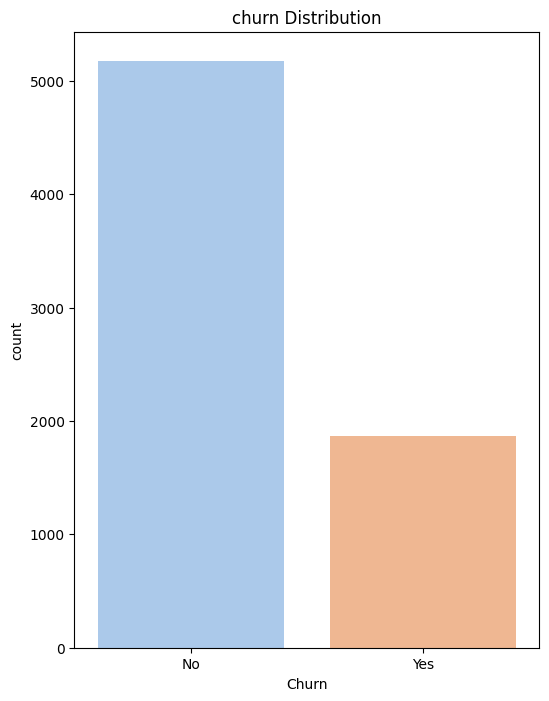

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,8))
sns.countplot(x=df["Churn"],palette ="pastel")
plt.title("churn Distribution")
plt.show()

churn_rate = df["Churn"].value_counts(normalize=True)*100
print(churn_rate)

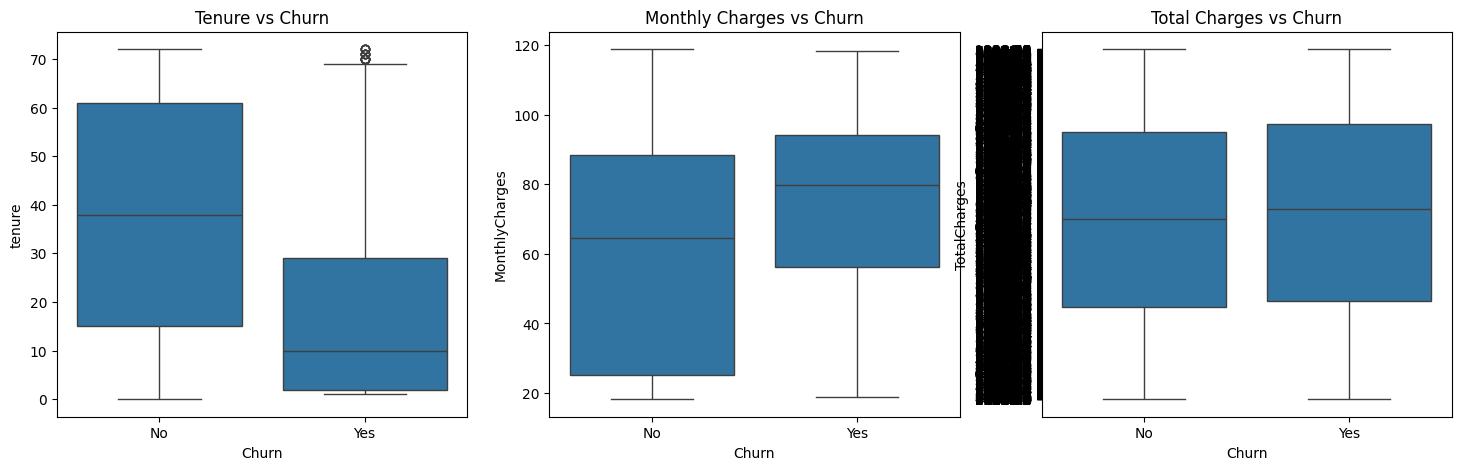

In [21]:
#understand Numerical features #tenure #monthly_charges,#totalcharges
fig,axes =plt.subplots(1,3,figsize=(18,5))

sns.boxplot(x="Churn",y="tenure",data=df,ax=axes[0])
axes[0].set_title("Tenure vs Churn")

sns.boxplot(x="Churn",y='MonthlyCharges',data=df,ax=axes[1])
axes[1].set_title("Monthly Charges vs Churn")

sns.boxplot(x="Churn",y="TotalCharges",data =df, ax =axes[2])
axes[2].set_title("Total Charges vs Churn")

plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

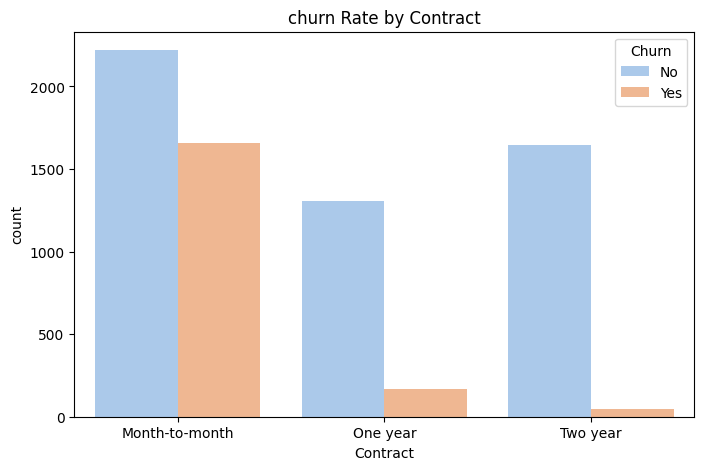

In [22]:
#understanding catergorical features
#churn rate by Contract

plt.figure(figsize =(8,5))
sns.countplot(x="Contract",hue ="Churn", data=df,palette ="pastel")
plt.title("churn Rate by Contract")
plt

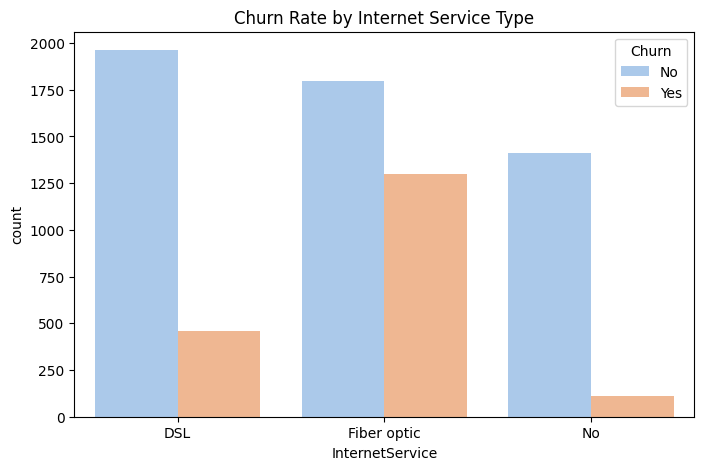

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="pastel")
plt.title("Churn Rate by Internet Service Type")
plt.show()

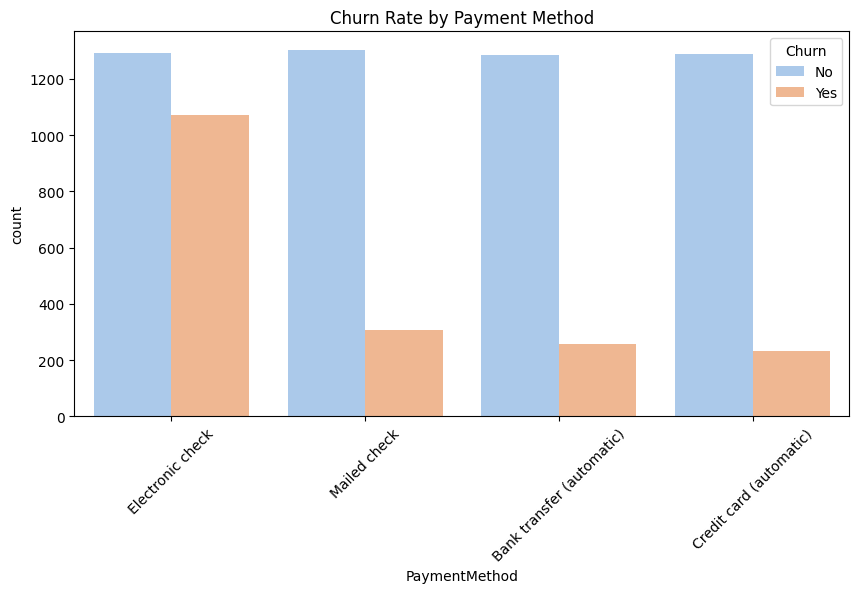

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="pastel")
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.show()

In [25]:
#Key churn dricers
#Internet service + fiber optic users churn more than dsl
#Tenure - new customers(low tenure) have highest churn
#Monthly Charges -Higher charges are linked to more churn
#payment method - Electronic check users have highest churn

In [26]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [11]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
#lets drop customerID
if "customerID" in df.columns:
    df.drop(columns=["customerID"], inplace=True)



In [42]:
#convert yes/no columns to 1,0



# Convert 'Churn' from Yes/No to 1/0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Check for missing values in Churn
print("NaN values in Churn:", df["Churn"].isnull().sum())

NaN values in Churn: 0


In [43]:
# Convert binary categorical columns (Yes/No → 1/0)
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# Convert 'TotalCharges' to numeric (handle errors)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Apply One-Hot Encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

# Verify dataset structure
print("Dataset Shape after encoding:", df.shape)
print(df.head())


Dataset Shape after encoding: (7043, 31)
   SeniorCitizen  Partner  Dependents  tenure  PhoneService  PaperlessBilling  \
0              0        1           0       1             0                 1   
1              0        0           0      34             1                 0   
2              0        0           0       2             1                 1   
3              0        0           0      45             0                 0   
4              0        0           0       2             1                 1   

   MonthlyCharges  TotalCharges  Churn  gender_Male  \
0           29.85         29.85      0        False   
1           56.95       1889.50      0         True   
2           53.85        108.15      1         True   
3           42.30       1840.75      0         True   
4           70.70        151.65      1        False   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                            True              False   
1                           F

In [44]:
#Drop rows where TotalCharges is NaN (if any)
df = df.dropna()

# Confirm no missing values remain
print("Missing values after cleaning:\n", df.isnull().sum().sum())  # Should be 0


Missing values after cleaning:
 0


In [45]:
from sklearn.model_selection import train_test_split

#Define features and targets
X = df.drop(columns=["Churn"])
y=df["Churn"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
print("NaN values in y:", y.isnull().sum())

NaN values in y: 0


In [20]:
print("Training Features:", X_train.shape)
print("Testing Features:", X_test.shape)
print("Training Target:", y_train.shape)
print("Testing Target:", y_test.shape)

Training Features: (5634, 30)
Testing Features: (1409, 30)
Training Target: (5634,)
Testing Target: (1409,)


In [48]:
print("Before SMOTE - Class distribution in y_train:")
print(y_train.value_counts())

Before SMOTE - Class distribution in y_train:
Churn
0    4130
1    1495
Name: count, dtype: int64


In [49]:
#lets handle imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy =0.5,random_state=42)

X_train_balanced,y_train_balanced =smote.fit_resample(X_train,y_train)


print("class distribution after SMOTE:")
print(y_train_balanced.value_counts())

class distribution after SMOTE:
Churn
0    4130
1    2065
Name: count, dtype: int64


In [52]:
#Train the model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#initialize scaler
scaler =StandardScaler()

#scale numerical features
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train_balanced)

y_pred =model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.7647

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407


Confusion Matrix:
[[837 196]
 [135 239]]


In [53]:
#I will improvise the model will go with Random Forest
#Random Forest is a powerful ensemble model that handles imbalanced data well and can capture complex relationships.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Train model
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.7882

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
[[911 122]
 [176 198]]


In [ ]:
#The model is slightly more conservative, predicting fewer churn cases overall, reducing false alarms but missing some real churners.
#We need a balance of high recall and high precision

In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, scale_pos_weight=2)

# Train the model
xgb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Model Accuracy: 0.7555

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.73      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407


Confusion Matrix:
[[789 244]
 [100 274]]


In [56]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=2)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200],  # Number of trees
    "learning_rate": [0.01, 0.1, 0.2],  # Step size for optimization
    "max_depth": [3, 5, 7],  # Depth of trees
    "subsample": [0.8, 1.0],  # Fraction of samples used per tree
    "colsample_bytree": [0.8, 1.0]  # Fraction of features used per tree
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring="recall", n_jobs=-1, verbose=2)

# Perform hyperparameter tuning
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions with tuned model
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print(f"Optimized XGBoost Model Accuracy: {accuracy_xgb_tuned:.4f}")

# Classification report
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))

# Confusion matrix
print("\nOptimized Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_tuned))

# Best parameters
print("\nBest Hyperparameters Found:", grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Optimized XGBoost Model Accuracy: 0.7292

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.73      0.74      1407


Optimized Confusion Matrix:
[[722 311]
 [ 70 304]]

Best Hyperparameters Found: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [57]:
#Tune XGBoost with Bayesian Optimization
#This method searches intelligently for the best parameters, rather than trying every combination like Grid Search.

In [60]:
from skopt import BayesSearchCV
from xgboost import XGBClassifier

# Define XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=2)

# Define parameter space for Bayesian Search
param_space = {
    "n_estimators": (100, 300),  # Trees in range 100-300
    "learning_rate": (0.01, 0.3),  # Learning rate between 0.01 and 0.3
    "max_depth": (3, 10),  # Tree depth 3-10
    "subsample": (0.6, 1.0),  # Subsample ratio 60%-100%
    "colsample_bytree": (0.6, 1.0)  # Feature sample ratio 60%-100%
}

# Bayesian Optimization
opt = BayesSearchCV(
    xgb_model,
    param_space,
    n_iter=30,  # Number of iterations to find the best parameters
    cv=3,  # 3-fold cross-validation
    scoring="recall",  # Maximize recall for churn detection
    random_state=42,
    n_jobs=-1
)

# Fit model
opt.fit(X_train_balanced, y_train_balanced)

# Get best model
best_xgb_bo = opt.best_estimator_

# Make predictions
y_pred_xgb_bo = best_xgb_bo.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_xgb_bo = accuracy_score(y_test, y_pred_xgb_bo)
print(f"Optimized XGBoost (Bayesian) Model Accuracy: {accuracy_xgb_bo:.4f}")

print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_xgb_bo))

print("\nOptimized Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_bo))

print("\nBest Hyperparameters Found:", opt.best_params_)


Optimized XGBoost (Bayesian) Model Accuracy: 0.7285

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.73      0.74      1407


Optimized Confusion Matrix:
[[721 312]
 [ 70 304]]

Best Hyperparameters Found: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.01), ('max_depth', 3), ('n_estimators', 201), ('subsample', 1.0)])


In [59]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.2 MB/s eta 0:00:00


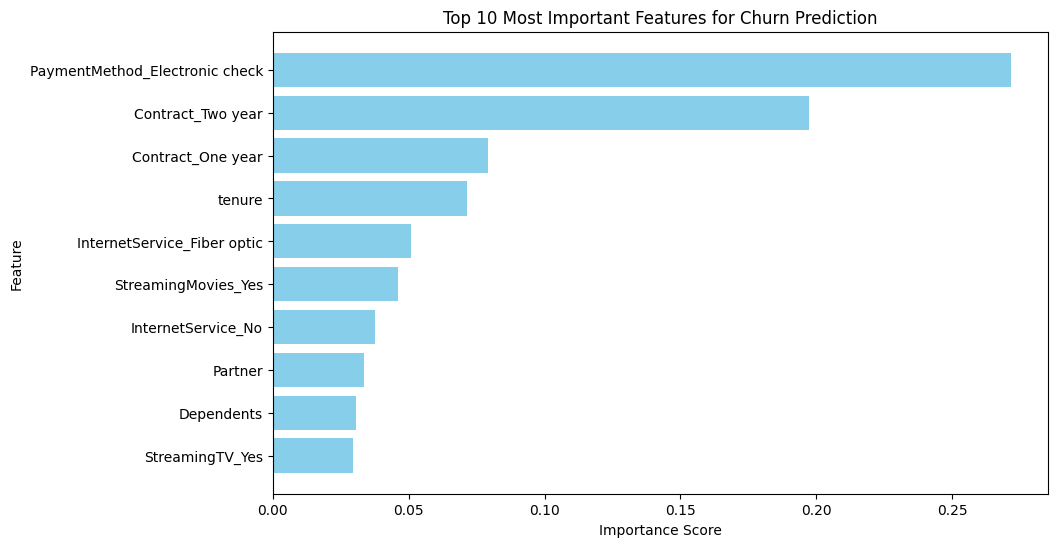

,Feature,Importance
28,PaymentMethod_Electronic check,0.271609
26,Contract_Two year,0.197491
25,Contract_One year,0.079353
3,tenure,0.071620
11,InternetService_Fiber optic,0.051002
24,StreamingMovies_Yes,0.046091
12,InternetService_No,0.037519
1,Partner,0.033577
2,Dependents,0.030724
22,StreamingTV_Yes,0.029406


In [61]:
#Feature importence analysis
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores from XGBoost
feature_importance = best_xgb_bo.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": X_train_balanced.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df["Feature"][:10], feature_importance_df["Importance"][:10], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features for Churn Prediction")
plt.gca().invert_yaxis()
plt.show()

# Display feature importance ranking
feature_importance_df


In [62]:
import joblib
model_path ="/content/drive/MyDrive/churn/xgboost_churn_model.pkl"

# Save the trained model
joblib.dump(best_xgb_bo, model_path)

# Confirm it's saved
print(f"Model saved at: {model_path}")

Model saved at: /content/drive/MyDrive/churn/xgboost_churn_model.pkl


In [63]:
#saving the feature names
import json
#get feature names
feature_names =list(X_train_balanced.columns)

feature_path ="/content/drive/MyDrive/churn/feature_names.json"
with open(feature_path,"w") as f:
  json.dump(feature_names,f)

print(f"feature names saved :{feature_path}")

feature names saved :/content/drive/MyDrive/churn/feature_names.json
